In [1]:
import pandas as pd
import numpy as np
import math
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import sklearn
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from datetime import datetime
%matplotlib inline

In [2]:
import requests,json
d = requests.get(
    "https://covid-19-greece.herokuapp.com/age-distribution-history")
data_list = json.loads(d.text)['age-distribution']
date = list()
cases1 = list()
cases2 = list()
cases3 = list()
cases4 = list()
for row in data_list:
    date.append(row['date'])
    cases1.append(row['deaths']['0-17'])
    cases2.append(row['deaths']['18-39'])
    cases3.append(row['deaths']['40-64'])
    cases4.append(row['deaths']['65+'])
data_dict = {'date':date,'0-17':cases1,'18-39':cases2,'40-64':cases3,'65+':cases4}
data = pd.DataFrame(data=data_dict)

{'cases': {'0-17': 43, '18-39': 463, '40-64': 686, '65+': 320},
 'critical': {'0-17': 0, '18-39': 0, '40-64': 40, '65+': 52},
 'date': '2020-04-03',
 'deaths': {'0-17': 0, '18-39': 1, '40-64': 17, '65+': 41}}

In [5]:
data_list[250]

{'cases': {'0-17': 7214, '18-39': 41965, '40-64': 47604, '65+': 18289},
 'critical': {'0-17': 1, '18-39': 14, '40-64': 250, '65+': 313},
 'date': '2020-12-09',
 'deaths': {'0-17': 0, '18-39': 23, '40-64': 461, '65+': 2805}}

In [51]:
date = list()
cases1 = list()
cases2 = list()
cases3 = list()
cases4 = list()
for row in data_list:
    date.append(row['date'])
    cases1.append(row['deaths']['0-17'])
    cases2.append(row['deaths']['18-39'])
    cases3.append(row['deaths']['40-64'])
    cases4.append(row['deaths']['65+'])

In [52]:
data_dict = {'date':date,'0-17':cases1,'18-39':cases2,'40-64':cases3,'65+':cases4}
data = pd.DataFrame(data=data_dict)

In [53]:
data.to_csv('age_distribution_deaths.csv')

In [54]:
data

,date,0-17,18-39,40-64,65+
0,2020-04-03,0,1,17,41
1,2020-04-04,0,1,18,49
2,2020-04-05,0,1,18,54
3,2020-04-06,0,1,20,58
4,2020-04-07,0,1,21,59
...,...,...,...,...,...
317,2021-02-14,1,46,898,5181
318,2021-02-15,1,46,901,5204
319,2021-02-16,1,46,906,5228
320,2021-02-17,1,46,908,5239


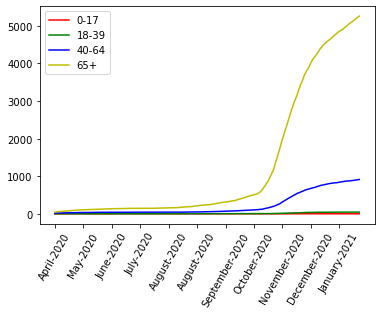

In [72]:
plt.plot([i for i in range(322)],data['0-17'],color = 'r',label="0-17")
plt.plot([i for i in range(322)],data['18-39'],color = 'g',label="18-39")
plt.plot([i for i in range(322)],data['40-64'],color = 'b',label="40-64")
plt.plot([i for i in range(322)],data['65+'],color = 'y',label="65+")
data.date = pd.to_datetime(data.date)
d = data.date
months = [d[i] for i in range(0,321,30)]
for i in range(len(months)):
    labels[i] = months[i].strftime("%B-%Y")
plt.xticks([i for i in range(0,321,30)],labels,rotation = 60)
plt.legend()
plt.show()


In [82]:
data.date[0].date().year

2020

In [66]:
months

[Timestamp('2020-04-03 00:00:00'),
 Timestamp('2020-05-03 00:00:00'),
 Timestamp('2020-06-02 00:00:00'),
 Timestamp('2020-07-02 00:00:00'),
 Timestamp('2020-08-01 00:00:00'),
 Timestamp('2020-08-31 00:00:00'),
 Timestamp('2020-09-30 00:00:00'),
 Timestamp('2020-10-30 00:00:00'),
 Timestamp('2020-11-29 00:00:00'),
 Timestamp('2020-12-29 00:00:00'),
 Timestamp('2021-01-28 00:00:00')]

In [65]:
labels

array(['April-2020', 'May-2020', 'June-2020', 'July-2020', 'August-2020',
       'August-2020', 'September-2020', 'October-2020', 'November-2020',
       'December-2020', 'January-2021'], dtype=object)

In [60]:
data.date[0]

Timestamp('2020-04-03 00:00:00')

In [25]:
labels

array(['2020-02-26', '2020-03-27', '2020-04-26', '2020-05-26',
       '2020-06-25', '2020-07-25', '2020-08-24', '2020-09-23',
       '2020-10-23', '2020-11-22', '2020-12-22', '2021-01-21'],
      dtype=object)

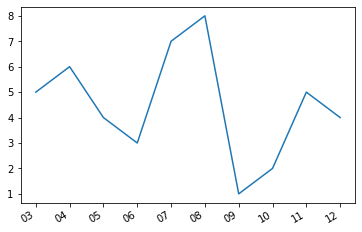

In [13]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

myDates = [datetime(2012,1,i+3) for i in range(10)]
myValues = [5,6,4,3,7,8,1,2,5,4]
fig, ax = plt.subplots()
ax.plot(myDates,myValues)

myFmt = DateFormatter("%d")
ax.xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
fig.autofmt_xdate()
plt.show()

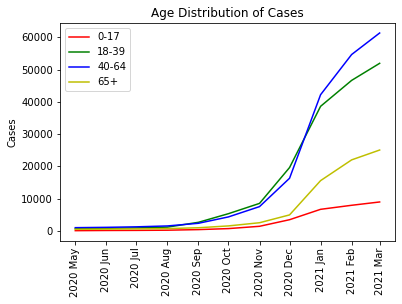

In [40]:


import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

data = pd.read_csv("age_distribution_cases.csv")

y_data = list()
y_data2 = list()
y_data3 = list()
y_data4 = list()

for i in range(26,320,27):
    y_data.append(data['0-17'][i])
    y_data2.append(data['18-39'][i])
    y_data3.append(data['40-64'][i])
    y_data4.append(data['65+'][i])

x_data = pd.date_range('2020-04-03', periods=len(y_data), freq='MS') 

fig, ax = plt.subplots()
ax.plot(x_data, y_data,color='r',label = "0-17")
ax.plot(x_data, y_data2,color='g',label = "18-39")
ax.plot(x_data, y_data3,color='b',label='40-64')
ax.plot(x_data, y_data4,color='y',label='65+')

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %b'))
_ = plt.xticks(rotation=90)
plt.title("Age Distribution of Cases")
plt.ylabel("Cases")
plt.legend()
plt.show()

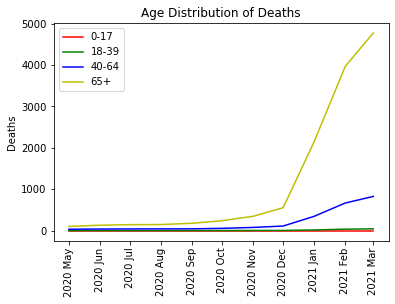

In [41]:


import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

data = pd.read_csv("age_distribution_deaths.csv")

y_data = list()
y_data2 = list()
y_data3 = list()
y_data4 = list()

for i in range(26,320,27):
    y_data.append(data['0-17'][i])
    y_data2.append(data['18-39'][i])
    y_data3.append(data['40-64'][i])
    y_data4.append(data['65+'][i])

x_data = pd.date_range('2020-04-03', periods=len(y_data), freq='MS') 

fig, ax = plt.subplots()
ax.plot(x_data, y_data,color='r',label = "0-17")
ax.plot(x_data, y_data2,color='g',label = "18-39")
ax.plot(x_data, y_data3,color='b',label='40-64')
ax.plot(x_data, y_data4,color='y',label='65+')

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %b'))
_ = plt.xticks(rotation=90)
plt.title("Age Distribution of Deaths")
plt.ylabel("Deaths")
plt.legend()
plt.show()

In [31]:
data

,Unnamed: 0,date,0-17,18-39,40-64,65+
0,0,2020-04-03,43,463,686,320
1,1,2020-04-04,45,488,712,331
2,2,2020-04-05,48,507,739,345
3,3,2020-04-06,47,519,750,350
4,4,2020-04-07,48,532,790,367
...,...,...,...,...,...,...
315,315,2021-02-12,11248,57493,68799,28097
316,316,2021-02-13,11384,57861,69321,28290
317,317,2021-02-14,11460,58071,69586,28400
318,318,2021-02-15,11519,58262,69888,28535


# Data

In [16]:
data = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [17]:
info = pd.read_csv('owid-covid-codebook.csv')
pd.set_option('display.max_colwidth', -1)
info

,column,source,description
0,iso_code,International Organization for Standardization,ISO 3166-1 alpha-3 – three-letter country codes
1,continent,Our World in Data,Continent of the geographical location
2,location,Our World in Data,Geographical location
3,date,Our World in Data,Date of observation
4,total_cases,COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University,Total confirmed cases of COVID-19
5,new_cases,COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University,New confirmed cases of COVID-19
6,new_cases_smoothed,COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University,New confirmed cases of COVID-19 (7-day smoothed)
7,total_deaths,COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University,Total deaths attributed to COVID-19
8,new_deaths,COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University,New deaths attributed to COVID-19
9,new_deaths_smoothed,COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University,New deaths attributed to COVID-19 (7-day smoothed)


## New cases

In [18]:
def gauss(x, mu, sigma, scale):
    return scale * np.exp(-1 * ((x - mu) ** 2) / (2 * (sigma ** 2) )) 

def weib(x, k, a, b, g):
    return k * g * b * (a ** b) * np.exp(-1 * g * ((a / x)  ** b)) / (x ** (b + 1))

def fit(func, x, y, start):
    outliersweight = None
    for i in range(100):
        popt, pcov = curve_fit(func, x, y, start, sigma=outliersweight, maxfev=10000)
        pred = np.array([func(px, *popt) for px in x])
        outliersweight = np.abs(pred - y)
        outliersweight = 1 - np.tanh(outliersweight)
        outliersweight = outliersweight / np.max(outliersweight)
        outliersweight = sp.special.softmax(1 - outliersweight)
    return func(x,*popt),popt

In [20]:
greece_data = data[data['location'] == 'Greece']
greece_data[['date']]
cases = greece_data[["new_cases","date"]]
cases = cases.dropna(axis='rows')
cases = cases.reset_index(drop=True)
cases = cases.groupby('date')['new_cases'].sum().reset_index()

enconder = LabelEncoder()
cases['date'] = enconder.fit_transform(cases['date'])
cases

,date,new_cases
0,0,1.0
1,1,2.0
2,2,1.0
3,3,0.0
4,4,3.0
...,...,...
354,354,662.0
355,355,696.0
356,356,1081.0
357,357,754.0


In [7]:
greece_data.icu_patients

24091   NaN
24092   NaN
24093   NaN
24094   NaN
24095   NaN
         ..
24437   NaN
24438   NaN
24439   NaN
24440   NaN
24441   NaN
Name: icu_patients, Length: 351, dtype: float64

In [15]:
cases.new_cases[-14:]

333    334.0 
334    432.0 
335    814.0 
336    857.0 
337    713.0 
338    882.0 
339    795.0 
340    484.0 
341    538.0 
342    1221.0
343    1150.0
344    1069.0
345    1172.0
346    1106.0
Name: new_cases, dtype: float64

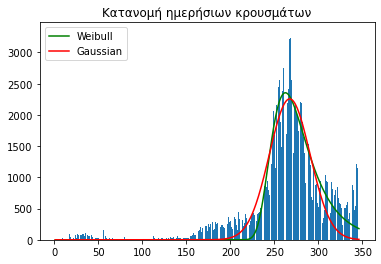

Νέα κρούσματα:            1150
Μέσος όρος κρουσμάτων:    468.517
Διασπορά:                 480272.492
Τυπική απόκλιση:          693.017


min    0.0   
25%    22.0  
50%    168.5 
75%    584.5 
max    3316.0
Name: new_cases, dtype: float64

In [34]:
x = cases.date + 1
plt.bar(x,cases.new_cases)

y,popt_weib = fit(func=weib,x=cases.date+1,y=cases.new_cases,start=[30000, 14, 4, 500])
plt.plot(x,y,color='g',label="Weibull")


y,popt_gauss = fit(func=gauss,x=cases.date+1,y=cases.new_cases,start=[0, 20, 100])
plt.plot(x,y,color='r',label="Gaussian")

plt.legend()
plt.title("Κατανομή ημερήσιων κρουσμάτων")
plt.show()

print(f"Νέα κρούσματα: %15d" % cases.new_cases.values[343])
print(f"Μέσος όρος κρουσμάτων: %10.3f" % np.mean(cases.new_cases.values))
print(f"Διασπορά: %26.3f" % np.var(cases.new_cases.values))
print(f"Τυπική απόκλιση: %16.3f" % np.std(cases.new_cases.values))

cases['new_cases'].describe()[3:]

In [35]:
cases.new_cases.tail()

341    538.0 
342    1221.0
343    1150.0
344    1069.0
345    1172.0
Name: new_cases, dtype: float64

In [36]:
scaler = MinMaxScaler()
cases['new_cases'] = scaler.fit_transform(cases[['new_cases']])

xtrain = []
ytrain = []
for i in range(14,len(cases.new_cases)):
    xtrain.append(cases.new_cases[i-14:i])
    ytrain.append(cases.new_cases[i])
xtrain,ytrain = np.array(xtrain),np.array(ytrain)

xtrain = xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)


def prepare_tf():
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.allow_growth = True

    return tf.compat.v1.Session(config=config)
prepare_tf()

nn = Sequential()

nn.add(LSTM(units=50, return_sequences=True,input_shape=(xtrain.shape[1],1)))
nn.add(Dropout(0.2))

nn.add(LSTM(units=50, return_sequences=True))
nn.add(Dropout(0.2))

nn.add(LSTM(units=50, return_sequences=True))
nn.add(Dropout(0.2))

nn.add(LSTM(units=50))
nn.add(Dropout(0.2))

nn.add(Dense(units = 1))

nn.compile(optimizer = "adam",loss = "mean_squared_error")

nn.fit(xtrain,ytrain,epochs=100,batch_size = 28)

Epoch 1/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0342
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0152
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0116
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0134
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0122
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0110
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0107
Epoch 8/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0108
Epoch 9/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0110
Epoch 10/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0110
Epoch 11/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0111
Epoch 12/100
12/12 [==============================] - 0s 8ms/step - loss: 0.0105
Epoch 13/100
12/12 [=================

In [37]:
l = len(cases.new_cases)
xtest = np.array(cases.new_cases[l-14:l])
xtest = xtest.reshape(1,14,1)

new_cases_prediction_sc = nn.predict(xtest)
new_cases_prediction = scaler.inverse_transform(new_cases_prediction_sc)

In [43]:
print(f"Πρόβλεψη κρουσμάτων για {datetime.today().strftime('%Y-%m-%d')}: {math.floor(new_cases_prediction[0][0])}")

Πρόβλεψη κρουσμάτων για 2021-02-06: 1058


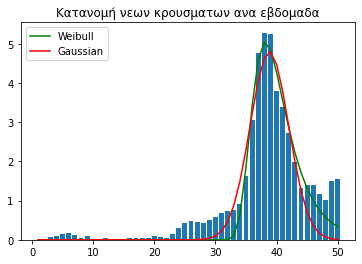

Νέα εβδομαδιαία κρούσματα:               1
Μέσος όρος κρουσμάτων ανα εβδομάδα:      0.978
Διασπορά :                                   1.927
Τυπική απόκλιση:                         1.388


min    0.002111
25%    0.046818
50%    0.428528
75%    1.379750
max    5.279554
Name: new_cases, dtype: float64

In [39]:
cases[['date']] = enconder.inverse_transform(cases[['date']])
cases.date = pd.to_datetime(cases['date'] ,errors = 'coerce',format = '%Y-%m-%d')
cases.index = cases['date']
cases = cases.drop('date',axis=1)

cases_week = cases.resample('W').sum()

cases_week = cases_week.reset_index()
cases_week['date'] = [i for i in range(len(cases_week))]


x = cases_week.date + 1
plt.bar(x,cases_week.new_cases)

y,popt_weib_week = fit(func=weib,x=cases_week.date+1,y=cases_week.new_cases,start=[30000, 14, 4, 500])
plt.plot(x,y,color='g',label="Weibull")


y,popt_gauss_week = fit(func=gauss,x=cases_week.date+1,y=cases_week.new_cases,start=[0, 20, 100])
plt.plot(x,y,color='r',label="Gaussian")

plt.legend()

plt.title("Κατανομή νεων κρουσματων ανα εβδομαδα")
plt.show()

print(f"Νέα εβδομαδιαία κρούσματα: %15d" % cases_week.new_cases.values[49])
print(f"Μέσος όρος κρουσμάτων ανα εβδομάδα: %10.3f" % np.mean(cases_week.new_cases.values))
print(f"Διασπορά : %39.3f" % np.var(cases_week.new_cases.values))
print(f"Τυπική απόκλιση: %29.3f" % np.std(cases_week.new_cases.values))

cases_week['new_cases'].describe()[3:]

# Percent of cases / tests

In [6]:
c = greece_data[["new_tests","date"]]
c = c.groupby('date')['new_tests'].sum().reset_index()
c = c[c.new_tests > 0]
indexes = c.index
new_cases_tests = greece_data[['date','new_cases']].reset_index().dropna().drop('index',axis=1)
new_cases_tests = new_cases_tests.loc[indexes]
new_cases_tests = pd.concat((new_cases_tests,c.new_tests),axis=1)
new_cases_tests['percent'] = (new_cases_tests.new_cases / new_cases_tests.new_tests) * 100
new_cases_tests = new_cases_tests.reset_index().drop('index',axis=1)
new_cases_tests.describe()

,new_cases,new_tests,percent
count,281.000000,281.000000,281.000000
mean,520.829181,13751.964413,3.454185
std,726.302873,12352.306713,4.567806
min,0.000000,176.000000,0.000000
25%,27.000000,3855.000000,0.668693
50%,212.000000,9758.000000,2.094348
75%,714.000000,23900.000000,4.426271
max,3316.000000,63411.000000,53.409091


In [16]:
for i in range(14):
    print(new_cases_tests.iloc[i,0])
    print(new_cases_tests.iloc[i,1])
    print(new_cases_tests.iloc[i,2])


2020-03-13
91.0
520.0
2020-03-14
38.0
700.0
2020-03-15
103.0
600.0
2020-03-16
0.0
320.0
2020-03-21
35.0
658.0
2020-03-22
94.0
176.0
2020-03-23
71.0
638.0
2020-03-24
48.0
427.0
2020-03-25
78.0
1424.0
2020-03-28
95.0
886.0
2020-03-29
95.0
788.0
2020-03-30
56.0
810.0
2020-03-31
102.0
771.0
2020-04-01
101.0
618.0


<BarContainer object of 281 artists>

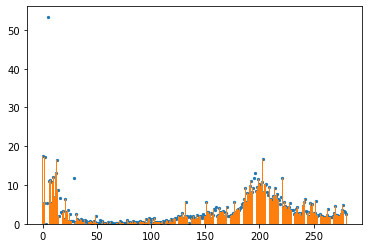

In [42]:
plt.scatter([i for i in range(len(new_cases_tests))],new_cases_tests.percent,s=5)
plt.bar([i for i in range(len(new_cases_tests))],new_cases_tests.percent)

In [43]:
deaths


<bound method DataFrame.drop of      index  new_deaths        date
0    24109  1.0         2020-03-11
1    24110  0.0         2020-03-12
2    24111  0.0         2020-03-13
3    24112  2.0         2020-03-14
4    24113  1.0         2020-03-15
..     ...  ...                ...
328  24437  22.0        2021-02-02
329  24438  27.0        2021-02-03
330  24439  25.0        2021-02-04
331  24440  19.0        2021-02-05
332  24441  29.0        2021-02-06

[333 rows x 3 columns]>

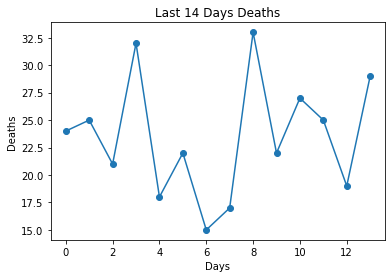

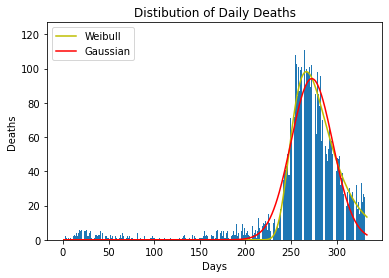

In [48]:

deaths = greece_data[['new_deaths','date']]
deaths = deaths.dropna().reset_index().drop('index',axis=1)

plt.figure()
plt.plot([i for i in range(14)], deaths.new_deaths[-14:], '-o')
plt.title("Last 14 Days Deaths")
plt.xlabel("Days")
plt.ylabel("Deaths")
plt.savefig("images/last_14_days_deaths.png")

plt.figure()
plt.bar([i for i in range(333)],deaths.new_deaths)
y,popt_weib_daily = fit(func=weib,x=[i for i in range(1,334,1)],y=deaths.new_deaths,start=[1000, 14, 4, 500])
plt.plot([i for i in range(1,334,1)],y,color='y',label="Weibull")

y,popt_gauss_daily = fit(func=gauss,x=[i for i in range(1,334,1)],y=deaths.new_deaths,start=[0, 20, 100])
plt.plot([i for i in range(1,334,1)],y,color='r',label="Gaussian")

plt.title("Distibution of Daily Deaths")
plt.xlabel("Days")
plt.ylabel("Deaths")
plt.legend()
plt.savefig("images/deaths_daily.png")

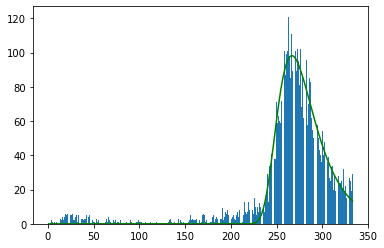